<h1><center>Sprint 8</center></h1>
<h2><center>Tasca 1: Exercicis d'algoritmes d'Agrupació..</center></h2>

In [1]:
# Packages
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import math
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

import pandas as pd
from sklearn.cluster import KMeans
from numpy.random import random
from scipy.spatial.distance import euclidean

In [2]:
# file paths
data_path = 'D:/Sistema_Solar/Python/itacademy/sprint08/data/'
data_path = Path(data_path)

- Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.


- Exercici 2
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.



- Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [3]:
# Apugem l'arxiu csv
file_name = 'Publicacions Facebook Thailandia.csv'
file = data_path / file_name
fb_thai = pd.read_csv(file, sep=',', header='infer', encoding="ISO-8859-1")

In [4]:
fb_thai

,ï»¿status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
fb_thai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ï»¿status_id      7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [6]:
# Eliminem el primer camp ja que sols conté un registre que identifica cada post del dataset. També el·liminem els 4 últims que no contenen cap informació.
fb_thai=fb_thai.loc[:, 'status_type':'num_angrys']

In [7]:
print(fb_thai.describe())

       num_reactions  num_comments   num_shares    num_likes    num_loves  \
count    7050.000000   7050.000000  7050.000000  7050.000000  7050.000000   
mean      230.117163    224.356028    40.022553   215.043121    12.728652   
std       462.625309    889.636820   131.599965   449.472357    39.972930   
min         0.000000      0.000000     0.000000     0.000000     0.000000   
25%        17.000000      0.000000     0.000000    17.000000     0.000000   
50%        59.500000      4.000000     0.000000    58.000000     0.000000   
75%       219.000000     23.000000     4.000000   184.750000     3.000000   
max      4710.000000  20990.000000  3424.000000  4710.000000   657.000000   

          num_wows    num_hahas     num_sads   num_angrys  
count  7050.000000  7050.000000  7050.000000  7050.000000  
mean      1.289362     0.696454     0.243688     0.113191  
std       8.719650     3.957183     1.597156     0.726812  
min       0.000000     0.000000     0.000000     0.000000  
25%   

Caldria passar a data el camp de status_published i podem crear un camp del dia de la setmana i altre de l'hora.

In [8]:
pd.to_datetime(fb_thai['status_published'], format='%m/%d/%Y %H:%M')

0      2018-04-22 06:00:00
1      2018-04-21 22:45:00
2      2018-04-21 06:17:00
3      2018-04-21 02:29:00
4      2018-04-18 03:22:00
               ...        
7045   2016-09-24 02:58:00
7046   2016-09-23 11:19:00
7047   2016-09-21 23:03:00
7048   2016-09-20 00:43:00
7049   2016-09-10 10:30:00
Name: status_published, Length: 7050, dtype: datetime64[ns]

In [9]:
#fb_thai['year'] = pd.DatetimeIndex(fb_thai['status_published']).year
#fb_thai['month'] = pd.DatetimeIndex(fb_thai['status_published']).month

In [10]:
fb_thai['dayofweek'] = pd.DatetimeIndex(fb_thai['status_published']).dayofweek

In [11]:
fb_thai

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,dayofweek
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,6
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,5
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,5
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,5
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,5
7046,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,4
7047,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,2
7048,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,1


El camp status_type conté dades categóriques. Cal passar aquesta informació a una numérica perquè el model pugui fer-ne ús. Podem crear camps dummies, un per cada tipus de status_type hi hagi. Així, aquest camp pendrà el valor de 0 excepte en el cas que coincidisca amb el valor de status_type.

In [12]:
dummy_status = pd.get_dummies(fb_thai['status_type'])

In [13]:
fb_thai = fb_thai.join(dummy_status)

In [14]:
# No seleccionem ni el camp status_type, ja que hem transformat les dades ni tampoc la data de publicació, ja que ens hem quedat amb la informació del dia de la setmana publicat.
col_sel = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys','dayofweek', 'link', 'photo', 'status', 'video']
fb_thai = fb_thai[col_sel]

In [15]:
fb_thai

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,dayofweek,link,photo,status,video
0,529,512,262,432,92,3,1,1,0,6,0,0,0,1
1,150,0,0,150,0,0,0,0,0,5,0,1,0,0
2,227,236,57,204,21,1,1,0,0,5,0,0,0,1
3,111,0,0,111,0,0,0,0,0,5,0,1,0,0
4,213,0,0,204,9,0,0,0,0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,5,0,1,0,0
7046,16,0,0,14,1,0,1,0,0,4,0,1,0,0
7047,2,0,0,1,1,0,0,0,0,2,0,1,0,0
7048,351,12,22,349,2,0,0,0,0,1,0,1,0,0


In [16]:
fb_thai_matrix = fb_thai.corr()

# Eliminarem les correlacions entre iguals per millorar la visualització posterior
for i in range(len(fb_thai_matrix.columns)):
    for j in range(len(fb_thai_matrix.columns)):
        if i == j:
            fb_thai_matrix.iloc[i][j] = np.nan

<AxesSubplot:>

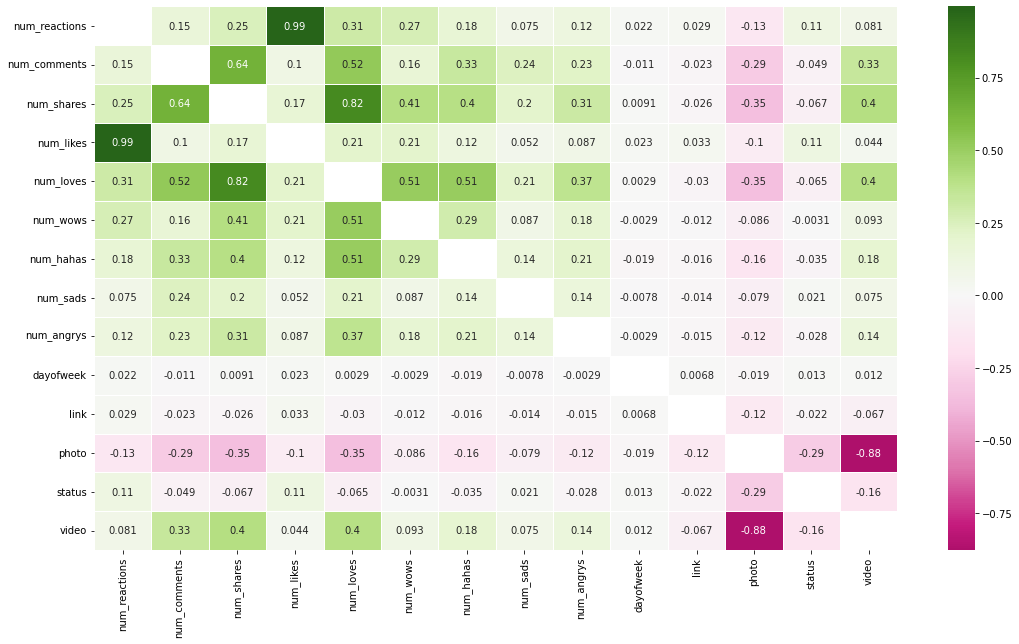

In [17]:
fig, ax = plt.subplots(figsize=(18,10))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

sns.heatmap(fb_thai_matrix, annot=True, linewidth=.5, ax=ax, cmap="PiYG", center=0)

Observem com el camp que hem creat, dayofweek, no es troba correlacionada altra vriable. Per tant, podem prescindir d'aquesta.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


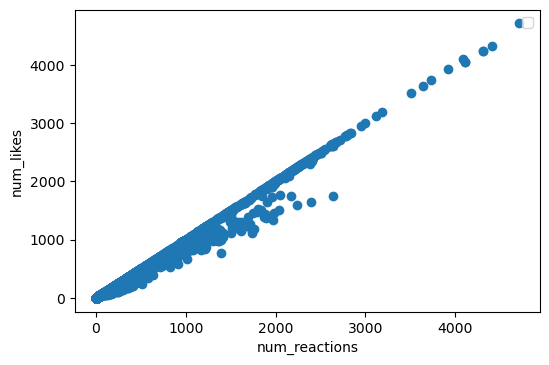

In [18]:
x = 'num_reactions'
y = 'num_likes'

fig = plt.figure(dpi=100)
ax = fig.add_subplot()

ax.scatter(fb_thai[x], fb_thai[y])
plt.xlabel(x)
plt.ylabel(y)

ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


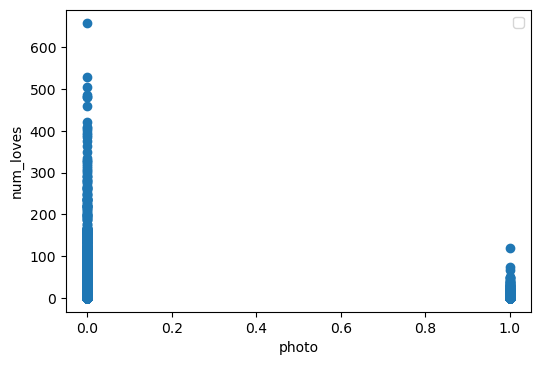

In [19]:
x = 'photo'
y = 'num_loves'

fig = plt.figure(dpi=100)
ax = fig.add_subplot()

ax.scatter(fb_thai[x], fb_thai[y])
plt.xlabel(x)
plt.ylabel(y)

ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


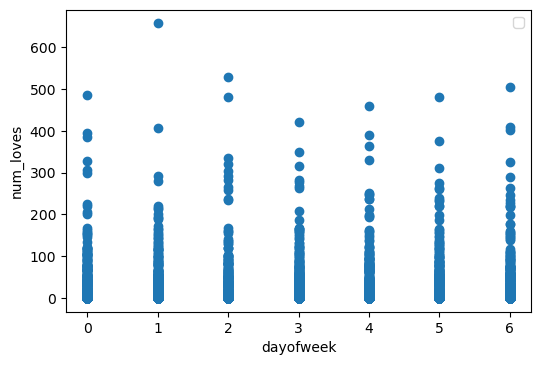

In [20]:
x = 'dayofweek'
y = 'num_loves'

fig = plt.figure(dpi=100)
ax = fig.add_subplot()

ax.scatter(fb_thai[x], fb_thai[y])
plt.xlabel(x)
plt.ylabel(y)

ax.legend()

In [21]:
fb_thai.columns

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'dayofweek', 'link',
       'photo', 'status', 'video'],
      dtype='object')

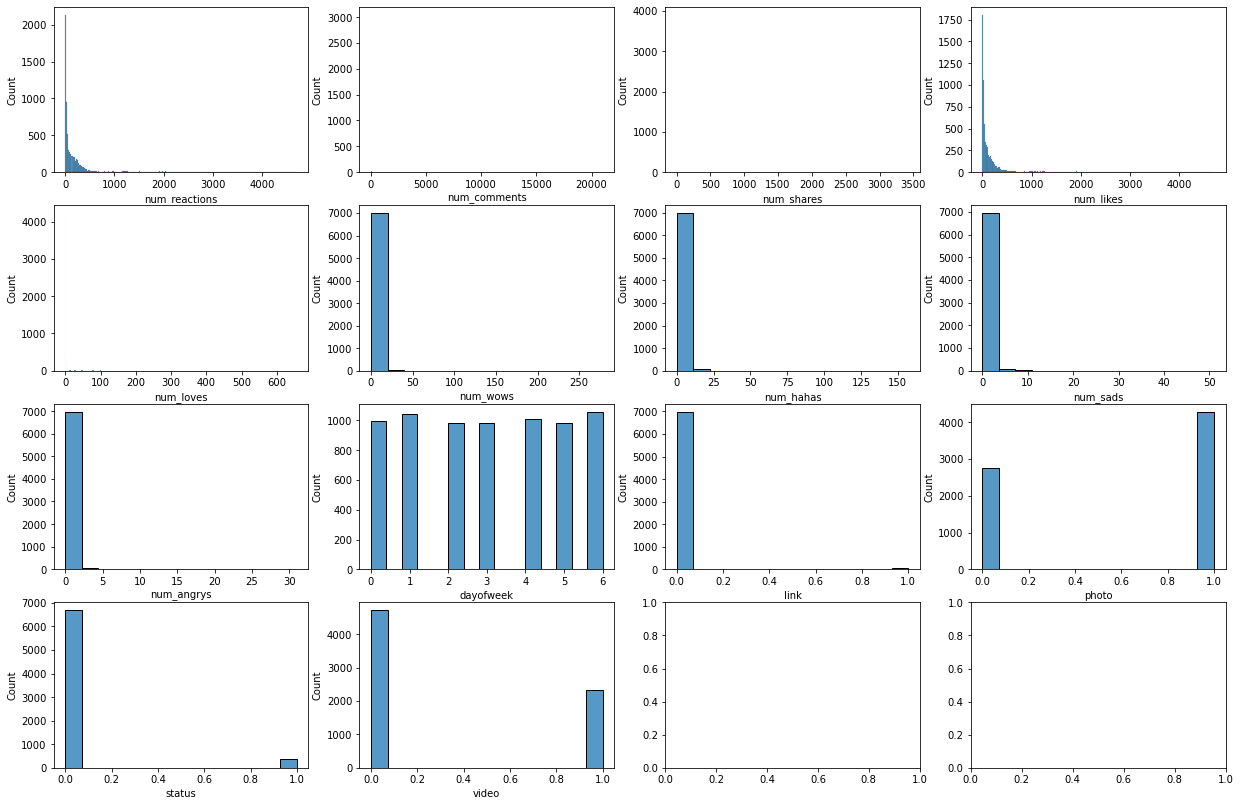

In [22]:
fig, ax = plt.subplots(4, 4, figsize=(21,14))
nrow = 0
ncol = 0

for col in fb_thai.columns:
    if col == 'num_comments':
        bins = 'auto'
    else:
        bins = 'auto'
    sns.histplot(fb_thai[col], bins=bins, ax=ax[nrow][ncol], cumulative=False)
    ncol += 1
    if ncol == 4:
        nrow += 1
        ncol = 0
        

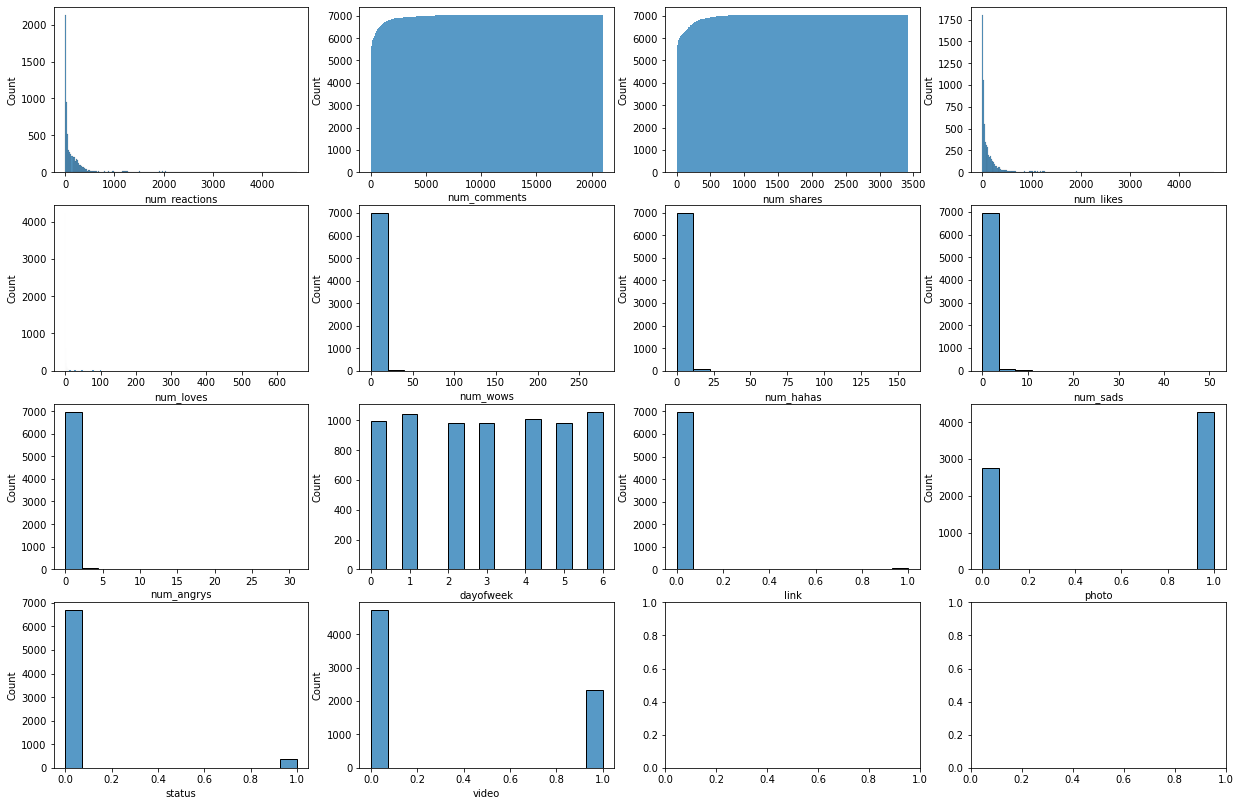

In [23]:
fig, ax = plt.subplots(4, 4, figsize=(21,14))
nrow = 0
ncol = 0

for col in fb_thai.columns:
    if col == 'num_comments' or col == 'num_shares':
        sns.histplot(fb_thai[col], bins=bins, ax=ax[nrow][ncol], cumulative=True)
    else:
        sns.histplot(fb_thai[col], bins=bins, ax=ax[nrow][ncol], cumulative=False)  
    ncol += 1
    if ncol == 4:
        nrow += 1
        ncol = 0

In [24]:
fb_thai.drop(['dayofweek'], axis=1, inplace=True)

In [25]:
fb_thai

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video
0,529,512,262,432,92,3,1,1,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,0,1,0,0
7046,16,0,0,14,1,0,1,0,0,0,1,0,0
7047,2,0,0,1,1,0,0,0,0,0,1,0,0
7048,351,12,22,349,2,0,0,0,0,0,1,0,0


Normalitzarem les dades

In [26]:
mmscaler = MinMaxScaler()

for col in fb_thai.columns:
    
    reshaped = np.array(fb_thai[col]).reshape(-1,1)
    
    normalized = mmscaler.fit_transform(reshaped)
    
    if col == col_sel[0]:
        fb_thai_norm = pd.DataFrame(normalized, columns=[col])
    else:
        fb_thai_norm[col] = normalized
    
    fb_thai_norm[col] = normalized

#### 1. Agrupació no supervisada amb K-Means

In [27]:
model = KMeans(n_clusters=3, random_state = 42)

model.fit(fb_thai_norm)

KMeans(n_clusters=3, random_state=42)

Com l'elecció del número de Clusters ha sigut arbitrària, podem utilizar el que s'anomena la inèrcia del model, per trobar el millor nombre de clusters. La inèrcia ens indica com de junt es troben les mostres en un cluster. Contra menor siga la inèrcia, el model serà millor. 

Així tenim que:



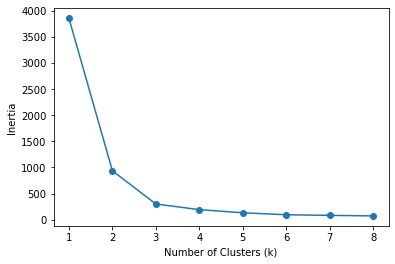

In [28]:
num_clusters = [1, 2, 3, 4, 5, 6, 7, 8]

inertias = []

for k in num_clusters:
  model = KMeans(n_clusters=k, random_state = 42)
  model.fit(fb_thai_norm)
  inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')
 
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
 
plt.show()

La inèrcia disminueix més ràpidament al principi de anar incrementant el nombre de cluster i ho fa més a poc poc amb un k més gran. Es pot elegir el moment en el quan incrementar un cluster més la inèrcia disminueix poc. Per exemple, k=3, com havíem elegit al principi.

In [29]:
model = KMeans(n_clusters=3, random_state = 42)

model.fit(fb_thai_norm)

KMeans(n_clusters=3, random_state=42)

Identificarem a quin cluser ha assignat el model cada una de les observacions

In [30]:
fb_thai_norm['cluster_id'] = model.labels_

def distance_to_centroid(row, centroid):
    row = row[fb_thai.columns]
    return euclidean(row, centroid)

# to get the cluster centers use km.cluster_centers_

fb_thai_norm['distance_to_center0'] = fb_thai_norm.apply(lambda r: distance_to_centroid(r,
    model.cluster_centers_[0]),1)

fb_thai_norm['distance_to_center1'] = fb_thai_norm.apply(lambda r: distance_to_centroid(r,
    model.cluster_centers_[1]),1)

In [31]:
fb_thai_norm

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,link,photo,status,video,cluster_id,distance_to_center0,distance_to_center1
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0,1,1.426190,0.117489
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0,0.010245,1.416520
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0,1,1.414712,0.039404
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0,0.021291,1.416850
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0,0.014996,1.415745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0,0.027763,1.417078
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0,0.0,1.0,0.0,0.0,0,0.049997,1.417978
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0,0.053785,1.418233
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0,0.051526,1.416087


Cluster n:0


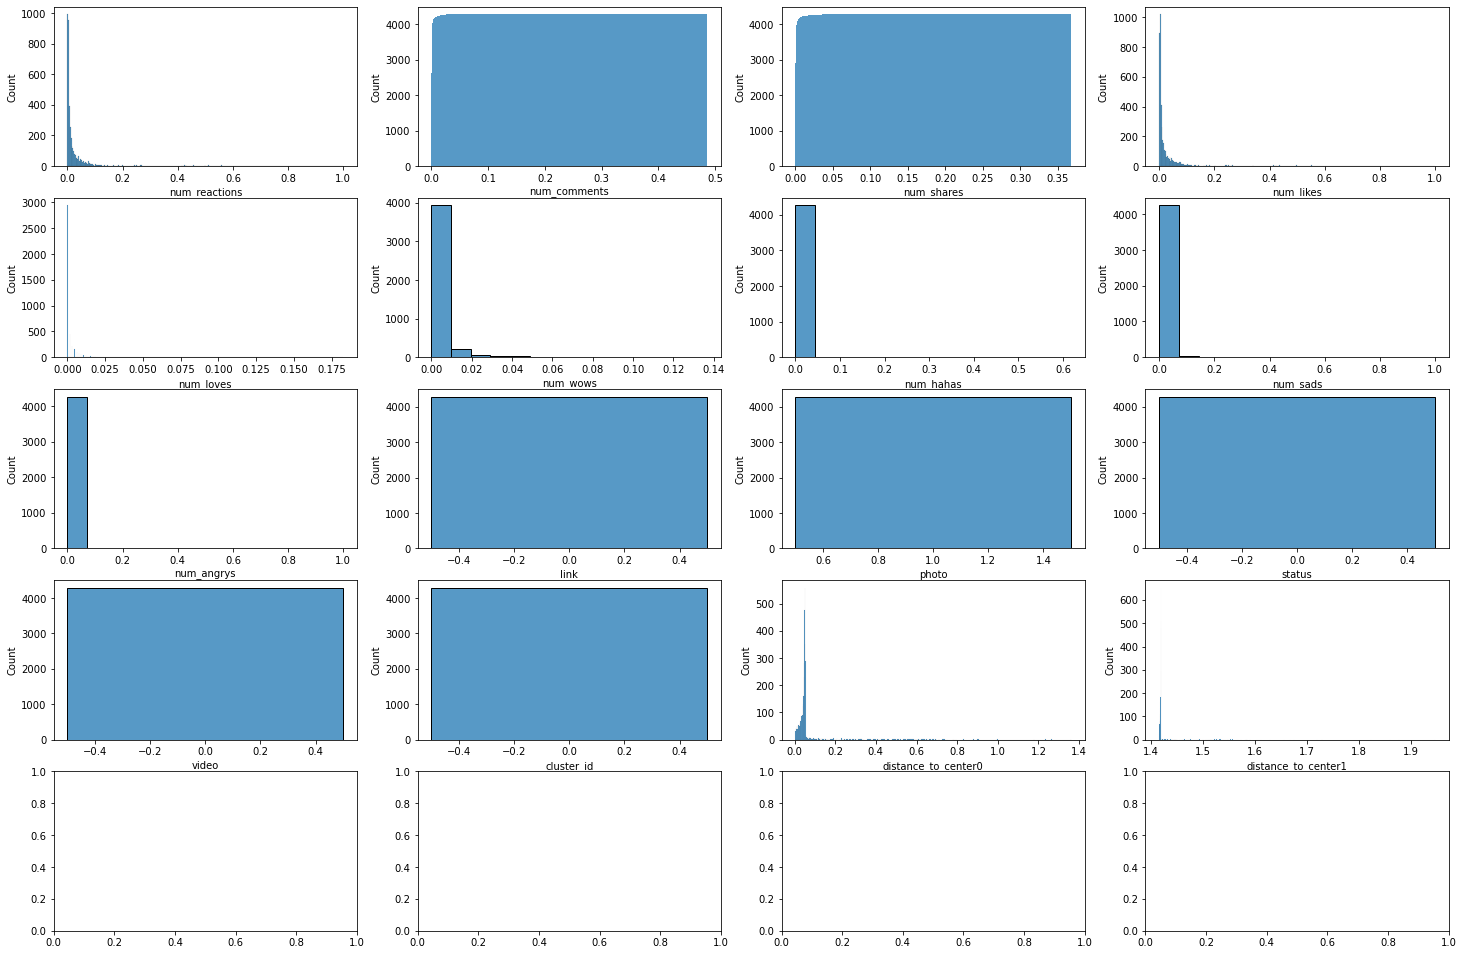

----------------------------------
Cluster n:1


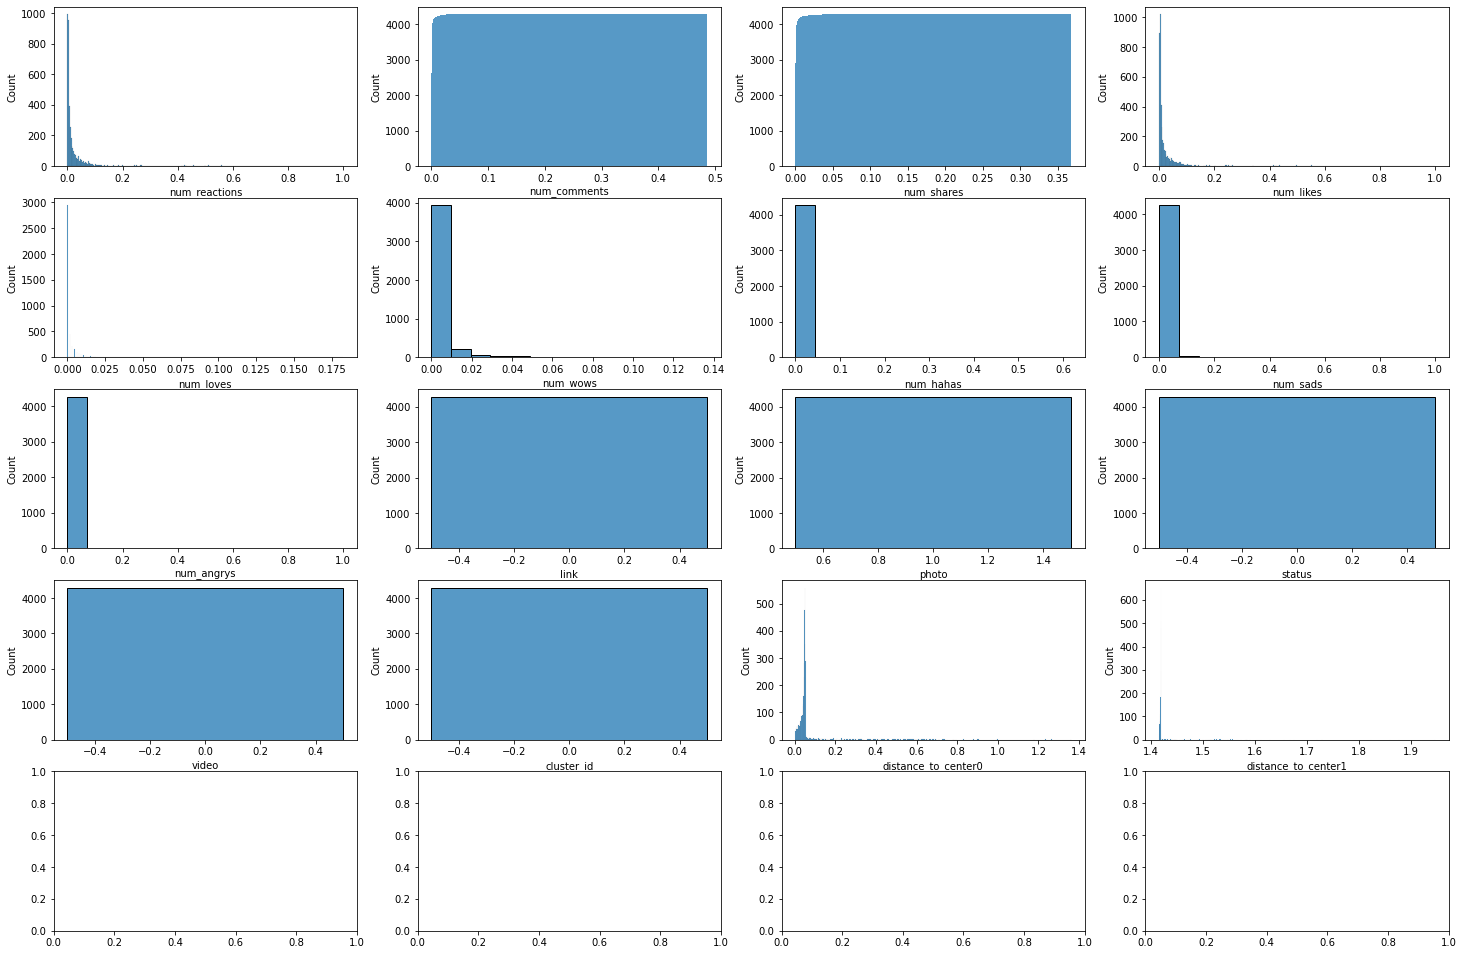

----------------------------------
Cluster n:2


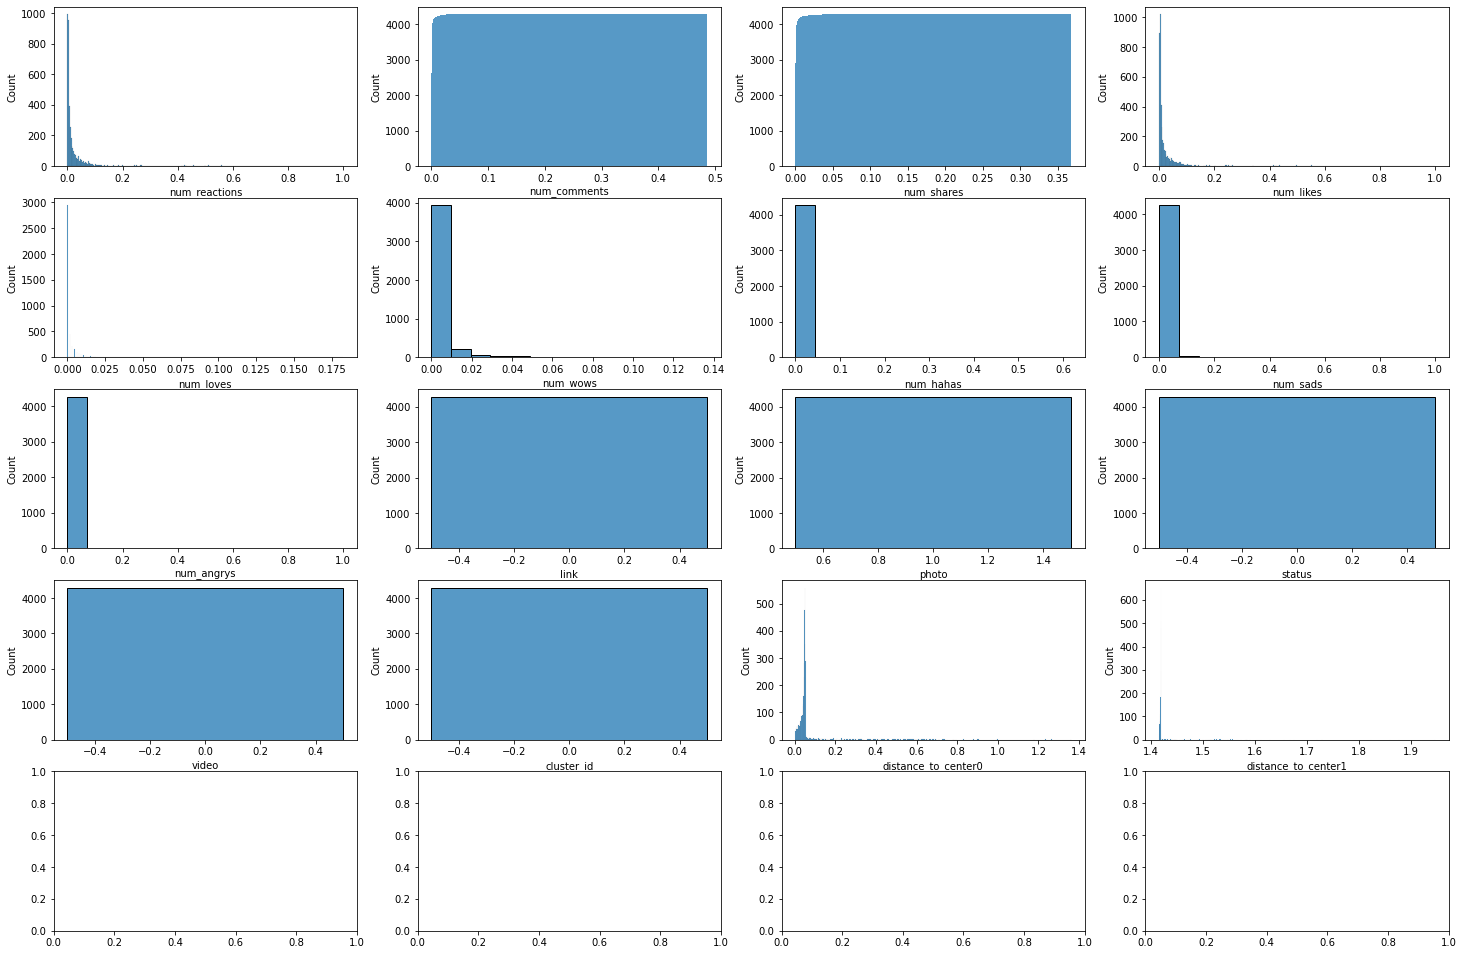

----------------------------------


In [32]:
for i in range(0,3):
    print(f'Cluster n:{i}')
    filter = fb_thai_norm['cluster_id'] == 0
    sub_fb = fb_thai_norm[filter]

    fig, ax = plt.subplots(5, 4, figsize=(25,17))
    nrow = 0
    ncol = 0

    for col in sub_fb.columns:
        if col == 'num_comments' or col == 'num_shares':
            sns.histplot(sub_fb[col], bins=bins, ax=ax[nrow][ncol], cumulative=True)
        else:
            sns.histplot(sub_fb[col], bins=bins, ax=ax[nrow][ncol], cumulative=False)  
        ncol += 1
        if ncol == 4:
            nrow += 1
            ncol = 0
    plt.show()
    print('----------------------------------')

for i in range(0,3):
    print(f'Cluster n:{i}')
    filter = fb_thai_norm['cluster_id'] == i
    sub_fb = fb_thai_norm[filter]
    print(sub_fb.describe()[['count','mean']])
    
    print('----------------------------------')

for i in range(0,3):
    print(f'Cluster n:{i}')
    filter = fb_thai_norm['cluster_id'] == i
    sub_fb = fb_thai_norm[filter]
    sub_fb.describe()
    
    print('----------------------------------')

In [33]:
i=0

filter = fb_thai_norm['cluster_id'] == i
sub_fb = fb_thai_norm[filter]
clust = pd.DataFrame({'Cluster 1':sub_fb.mean()})

i=1

filter = fb_thai_norm['cluster_id'] == i
sub_fb = fb_thai_norm[filter]
clust['Cluster 2'] = sub_fb.mean()

i=2

filter = fb_thai_norm['cluster_id'] == i
sub_fb = fb_thai_norm[filter]
clust['Cluster 3'] = sub_fb.mean()

In [34]:
clust

,Cluster 1,Cluster 2,Cluster 3
num_reactions,0.038491,0.060172,0.091015
num_comments,0.000762,0.030609,0.001512
num_shares,0.000746,0.033785,0.000826
num_likes,0.037957,0.051596,0.090409
num_loves,0.002200,0.054095,0.002095
num_wows,0.002463,0.008806,0.003698
num_hahas,0.001215,0.011052,0.000625
num_sads,0.002794,0.008115,0.006460
num_angrys,0.001474,0.008196,0.000678
link,0.000000,0.000000,0.147196


#### 2. Agrupació jeràrquica

In [35]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.spatial import distance_matrix 
from scipy.spatial.distance import squareform

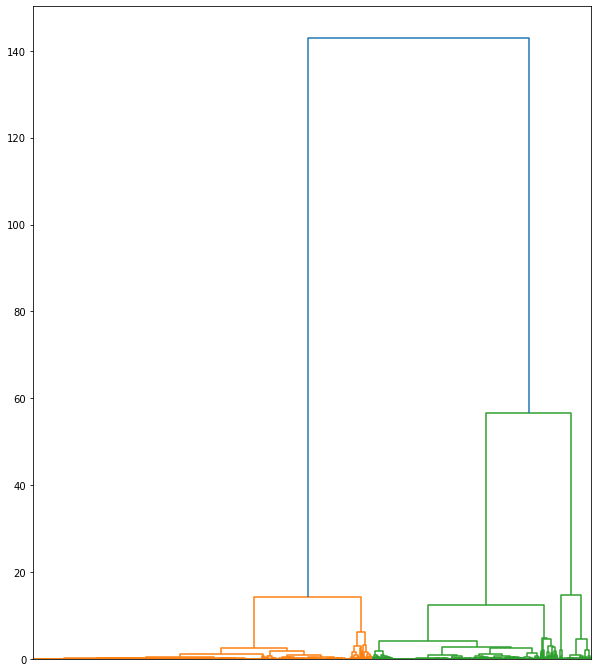

In [41]:
plt.subplots(1, 1, figsize=(10,12))
dend = sch.dendrogram(sch.linkage(fb_thai_norm, method='ward', metric="euclidean"), no_labels=True)

https://www.statdeveloper.com/agrupacion-en-cluster-jerarquica-en-python/

https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019

https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [42]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(fb_thai_norm)
labels = model.labels_

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit_transform(fb_thai_norm)
pca.explained_variance_ratio_.cumsum()

array([0.8417892 , 0.96939808, 0.98488542, 0.99302173, 0.99625416,
       0.9973571 , 0.9980572 , 0.99863101, 0.99905349, 0.99936178])

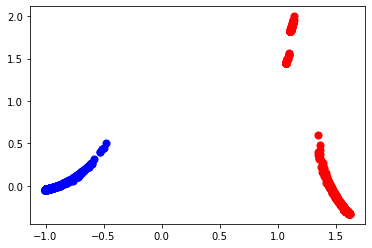

In [62]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(fb_thai_norm)

pc1_values = pcs[:,0]
pc2_values = pcs[:,1]

#sns.scatterplot(x=pc1_values, y=pc1_values)

plt.scatter(pc1_values_df[labels==0], pc2_values_df[labels==0], s=50, marker='o', color='red')
plt.scatter(pc1_values_df[labels==1], pc2_values_df[labels==1], s=50, marker='o', color='blue')

In [59]:
pc1_values_df[labels==0]

,0
0,1.582589
2,1.608097
6,1.578229
7,1.611929
15,1.604040
...,...
6991,1.105649
6992,1.581886
7015,1.106034
7016,1.105637


In [61]:
pc1_values_df = pd.DataFrame(pc1_values)
pc2_values_df = pd.DataFrame(pc2_values)

In [53]:
pc1_values_df

,0
0,1.582589
1,-0.997679
2,1.608097
3,-0.991950
4,-0.994223
...,...
7045,-0.988606
7046,-0.977114
7047,-0.975237
7048,-0.973891


In [49]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

7050

#### 2.1 Fent PCA abans

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit_transform(fb_thai_norm)
pca.explained_variance_ratio_.cumsum()

array([0.8417892 , 0.96939808, 0.98488542, 0.99302173, 0.99625416,
       0.9973571 , 0.9980572 , 0.99863101, 0.99905349, 0.99936178])

<AxesSubplot:>

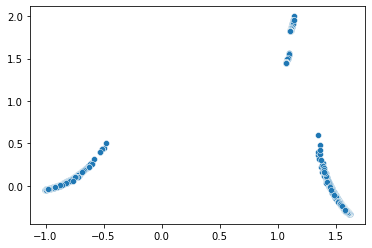

In [38]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(fb_thai_norm)

pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.8623773710222962
For n_clusters = 3 The average silhouette_score is : 0.9231860299254686
For n_clusters = 4 The average silhouette_score is : 0.9293465897127461
For n_clusters = 5 The average silhouette_score is : 0.8916775553466557
For n_clusters = 6 The average silhouette_score is : 0.8488340478745204
For n_clusters = 7 The average silhouette_score is : 0.8371364436922034
For n_clusters = 8 The average silhouette_score is : 0.8332560100524059
For n_clusters = 9 The average silhouette_score is : 0.8281286016630895
For n_clusters = 10 The average silhouette_score is : 0.8245079926265547


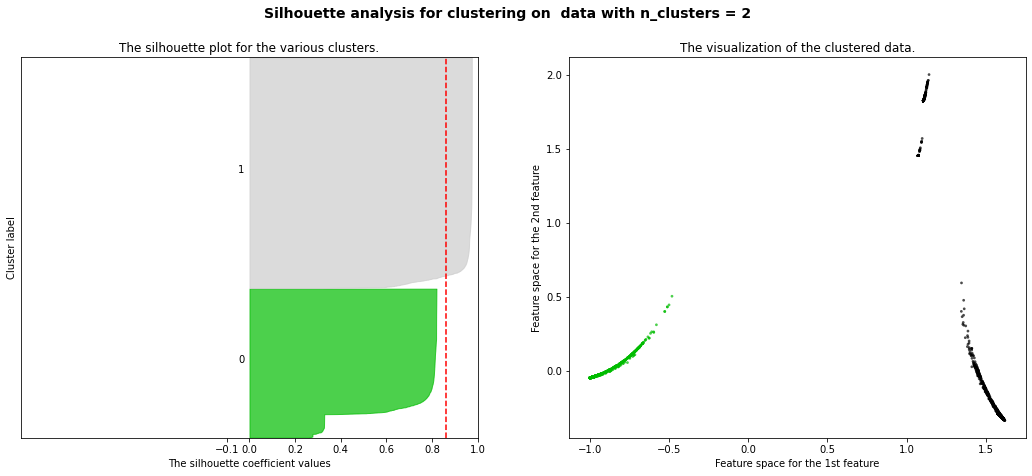

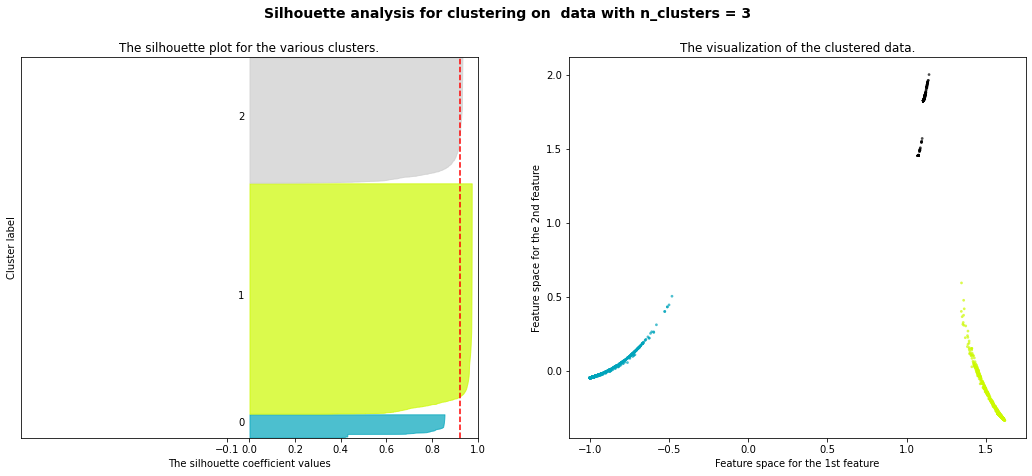

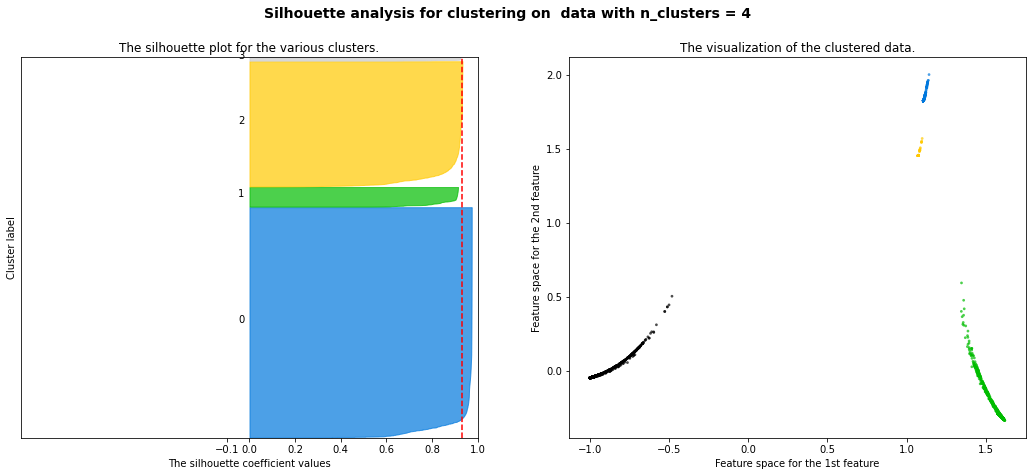

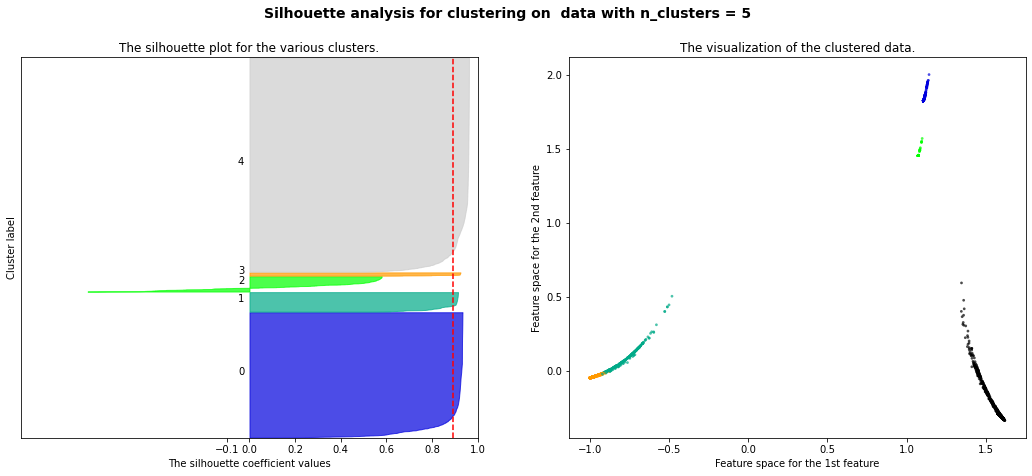

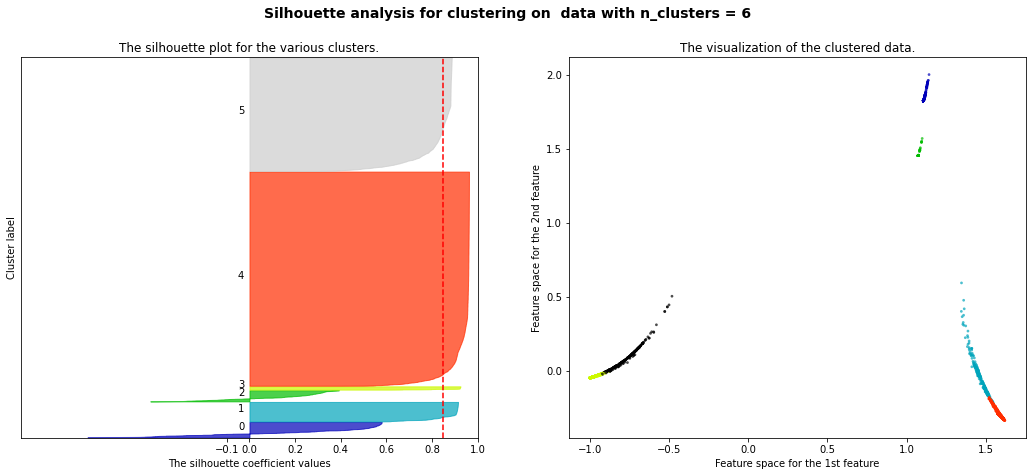

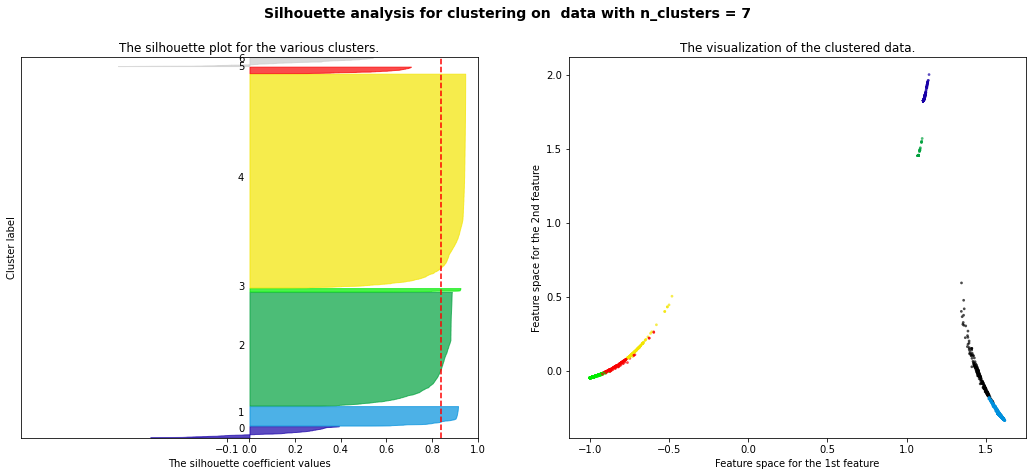

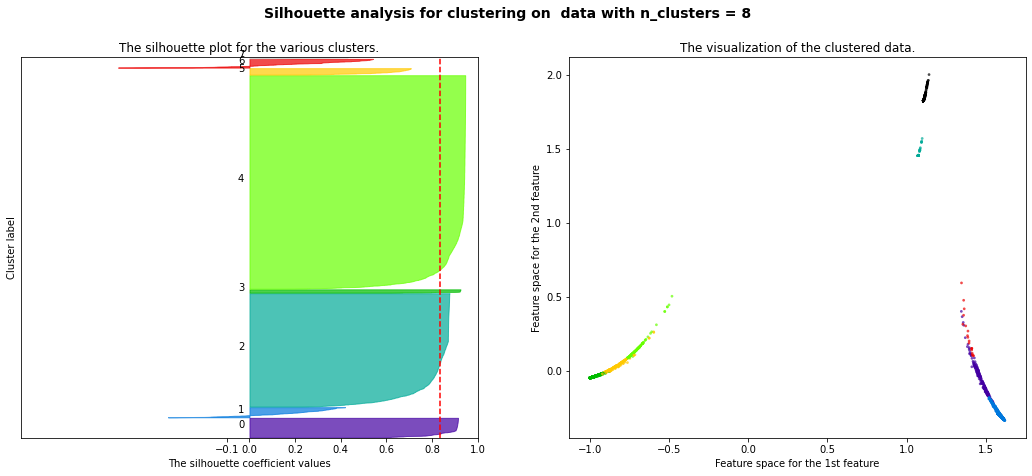

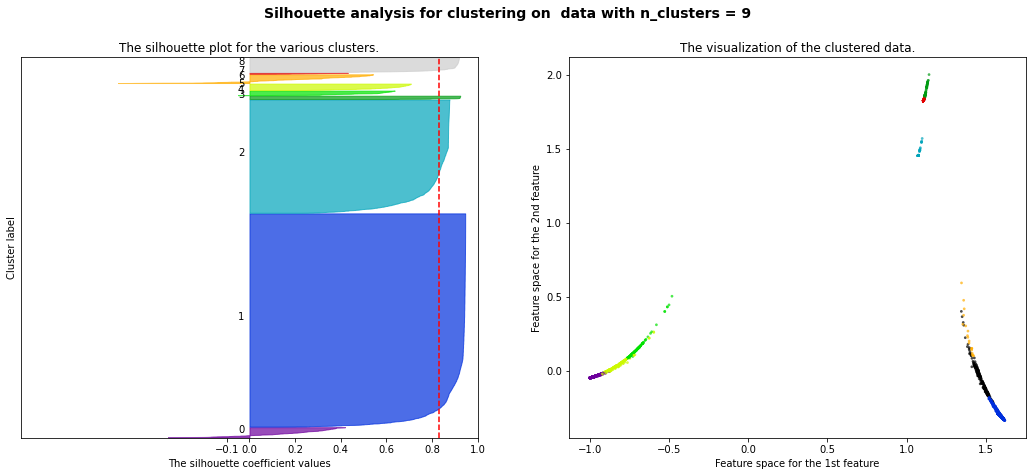

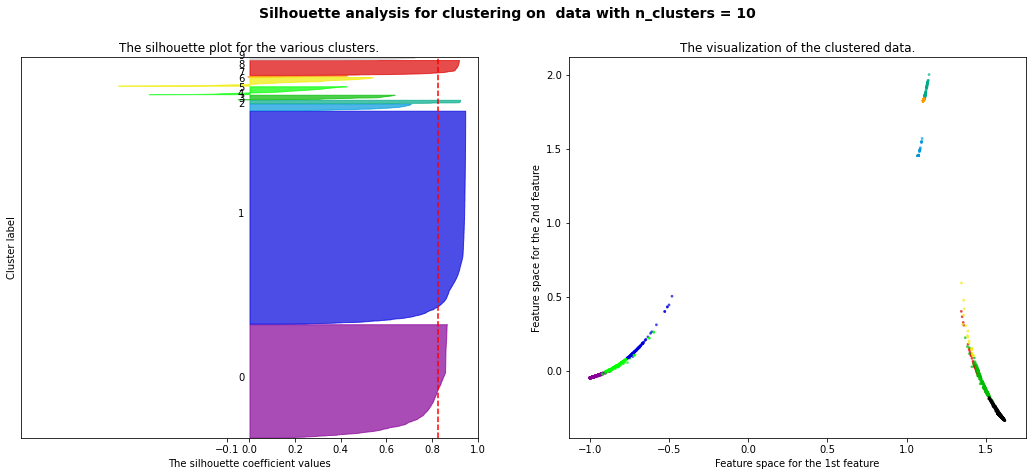

In [66]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm

for n_clusters in range(2,25):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
 
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(fb_thai_norm) + (n_clusters) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(fb_thai_norm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(fb_thai_norm, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
     # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(fb_thai_norm, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i+1) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float)) / n_clusters)
    ax2.scatter(pcs[:, 0], pcs[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

   

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for clustering on  data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [65]:
pca

PCA(n_components=2)

He intentat fer el clustering jeràrquic a partir de una matriu de distàncies. Però dona el mateix que si li passes directament el dataset.

In [39]:
dist_matrix = distance_matrix(fb_thai_norm, fb_thai_norm) 
condensed_dist_matrix = squareform(dist_matrix)
link = hierarchy.linkage(condensed_dist_matrix, 'complete')
plt.subplots(1, 1, figsize=(25,17))
dendro = sch.dendrogram(link)

NameError: name 'hierarchy' is not defined

In [ ]:
dist_matrix = distance_matrix(fb_thai_norm, fb_thai_norm) 
condensed_dist_matrix = squareform(dist_matrix)
link = hierarchy.linkage(condensed_dist_matrix, 'ward')
plt.subplots(1, 1, figsize=(25,17))
dendro = sch.dendrogram(link)

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs
from scipy.spatial import distance_matrix
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

X1, y1 = make_blobs(n_samples=50, centers=[[4,4],
                                           [-2, -1],
                                           [1, 1],
                                           [10,4]], cluster_std=0.9)

agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
agglom.fit(X1,y1)

dist_matrix = distance_matrix(X1,X1)
print(dist_matrix.shape)
condensed_dist_matrix = squareform(dist_matrix)
print(condensed_dist_matrix.shape)
Z = hierarchy.linkage(condensed_dist_matrix, 'complete')

In [ ]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs

%matplotlib inline
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
agglom.fit(X1,y1)
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')

# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

In [ ]:
Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = sch.dendrogram(Z)